In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
plt.style.use('./deeplearning.mplstyle')

np.set_printoptions(precision=2)

Using housing price prediction, as before, but with expanded features.

|Size (sqft)|# Bedrooms|# Floors|Age|Price ($1k)|
|---|---|---|---|---|
|2104|5|1|45|460|
|1416|3|2|40|232|
|852|2|1|35|178|

In [3]:
X_train = np.array([[2104, 5, 1, 45],
                   [1416, 3, 2, 40],
                   [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [4]:
# The (almost) provided starting w, b values that are close to optimal for speed's sake
w_0 = np.array([
    0.39, 18.75, -53.36, -26.42
])
b_0 = 785.18


## Prediction Function

In [15]:
def predict(x, w, b):
    # Vectorization, woo.
    return np.dot(x, w) + b

In [16]:
predict(X_train[0], w_0, b_0)

457.2299999999999

## Cost Function

In [191]:
def cost(X, y, w, b):
    m = X.shape[0]

    X = np.append(X, np.reshape(np.ones(m), (-1, 1)), axis=1)
    w = np.append(w, b)
    return np.sum((np.dot(X, w) - y) ** 2) / (2 * m)
    

In [192]:
print(cost(X_train, y_train, w_0, b_0))

# Just double checking it works with that tiny precision diff
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(cost(X_train, y_train, w_init, b_init)) 

2.050900000000251
1.5578904045996674e-12


## The Gradient Function

In [193]:
def gradient(X, y, w, b):
    m, n = X.shape
    
    X_1 = np.append(X, np.ones(m).reshape(-1, 1), axis=1)
    w_b = np.append(w, b)
    
    err = np.transpose(np.dot(X_1, w_b) - y)
    
    dj_db = np.sum(err) / m
    dj_dw = np.matmul(err, X) / m
    
    return dj_db, dj_dw

In [194]:
print(gradient(X_train, y_train, w_0, b_0))
print(gradient(X_train, y_train, w_init, b_init))

(-1.9066666666667895, array([-3.13e+03, -7.20e+00, -2.52e+00, -7.91e+01]))
(-1.6739251122999121e-06, array([-2.73e-03, -6.27e-06, -2.22e-06, -6.92e-05]))


## Gradient Descent

In [241]:
def gradient_descent(X, y, w, b, cost_fn=cost, grad_fn=gradient, iters=1000, alpha=0.0000005):
    # Woof, alpha needs to be hella tiny.
    J_hist = []
    for i in range(iters):
        db, dw = grad_fn(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        
        J_hist.append(cost_fn(X, y, w, b))
        
        if (i % (iters / 10) == 0):
            print(f"Iteration {i:4d}:\tCost: {J_hist[-1]}") #"\n\tw: {w}\n\tdw: {dw}\n\tb: {b}\tdb: {db}")
        
    return w, b, J_hist

In [242]:
w, b, J_hist = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), 0)

Iteration    0:	Cost: 2529.4629522316304
Iteration  100:	Cost: 695.9903158352028
Iteration  200:	Cost: 694.9206979323058
Iteration  300:	Cost: 693.8604297851192
Iteration  400:	Cost: 692.8094286135915
Iteration  500:	Cost: 691.7676123706057
Iteration  600:	Cost: 690.7348997354993
Iteration  700:	Cost: 689.7112101076165
Iteration  800:	Cost: 688.6964635999458
Iteration  900:	Cost: 687.6905810327936


In [250]:
for x in X_train:
    print(predict(x, w, b))

print(y_train)

426.185304971892
286.1674720078562
171.46763087132314
[460 232 178]


## Plotting results

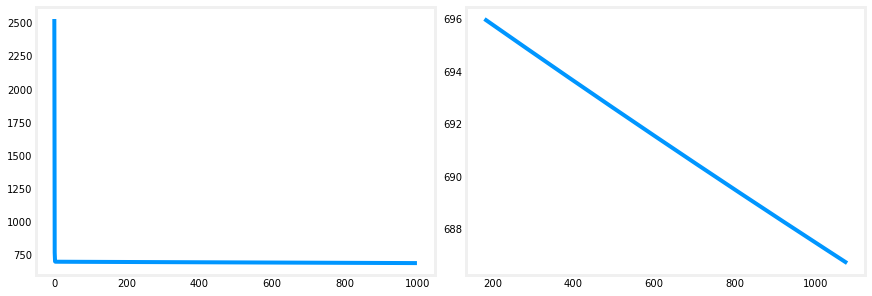

In [252]:
fix, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(180 + np.arange(len(J_hist[100:])), J_hist[100:])

plt.show()